In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
import warnings
warnings.filterwarnings("ignore")

In [2]:
base_path = "/Users/chidex/Nonsegmented"
random_seed = 111

categories = os.listdir(base_path)

In [3]:
print("All the class labels:- ",categories,"\n\nNo. of categories = ", len(categories))

All the class labels:-  ['Cleavers', 'Sugar beet', 'Common Chickweed', 'Loose Silky-bent', 'Scentless Mayweed', 'Shepherd’s Purse', 'Fat Hen', 'Common wheat', 'Black-grass', 'Small-flowered Cranesbill', 'Charlock', 'Maize'] 

No. of categories =  12


In [4]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(base_path+"/"+category)[:300]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "png") or (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
                #print(f"\nCategory = {category}, Image name = {image_name}")
                img = cv2.imread(base_path+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img_array = Image.fromarray(img, 'RGB')

                #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
                resized_img = img_array.resize((227, 227))

                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  3484 
No. of labels loaded =  3484
<class 'list'> <class 'list'>


In [5]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3484, 227, 227, 3) 
Labels shape =  (3484,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


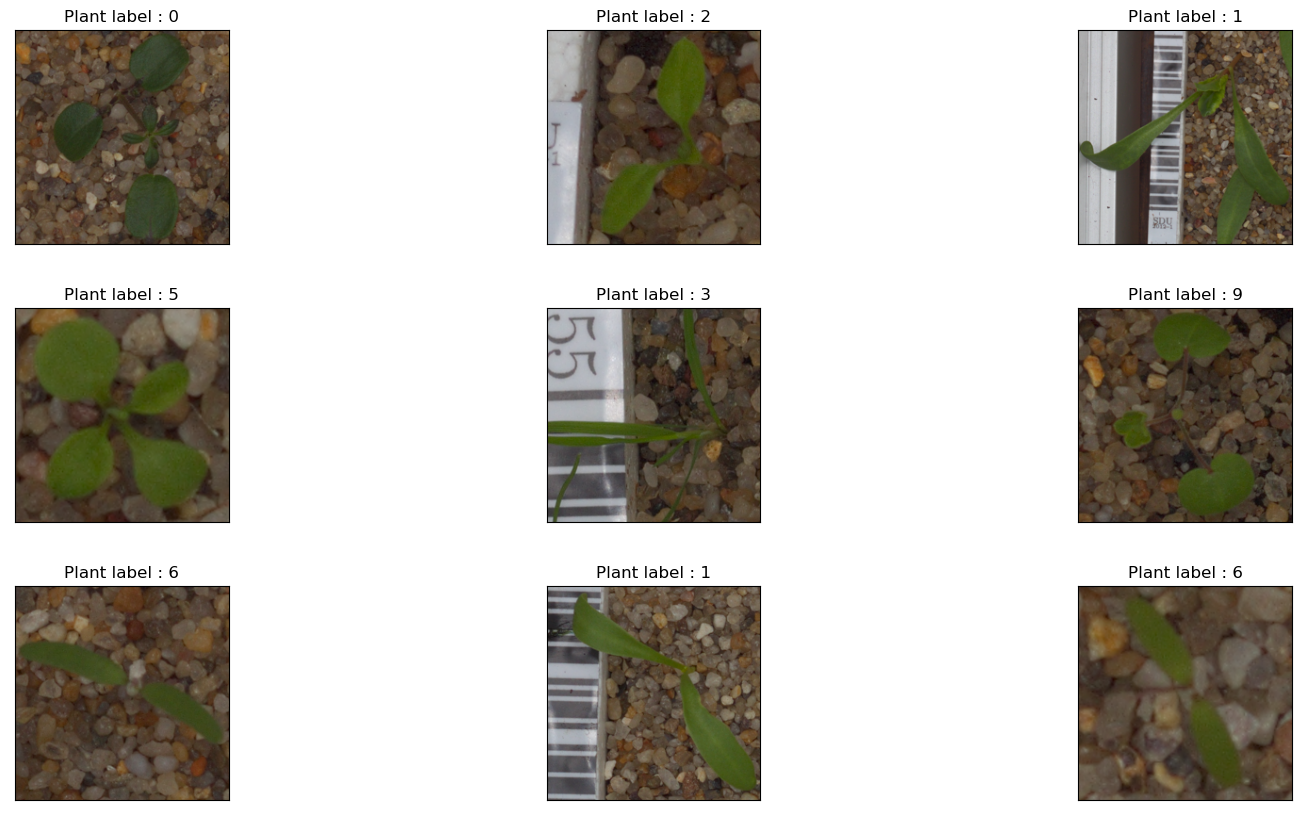

In [6]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Plant label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [7]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 3481 3482 3483]

'n' values after shuffling =  [3118 1557 1129 ...  724 2004 2924]


In [8]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (3484, 227, 227, 3) 
Labels shape after shuffling =  (3484,)


In [9]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3484, 227, 227, 3)


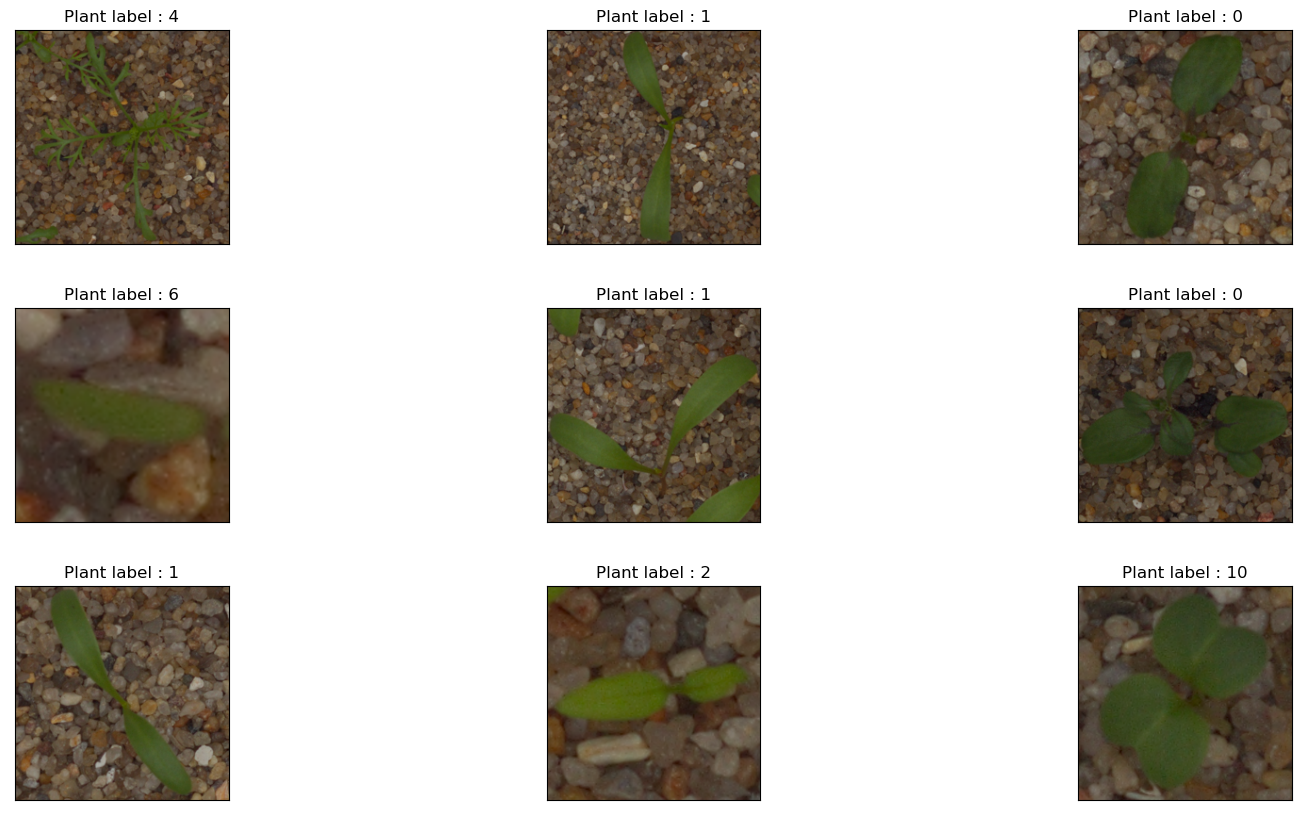

In [10]:
display_rand_images(images, labels)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2787, 227, 227, 3)
y_train shape =  (2787,)

x_test shape =  (697, 227, 227, 3)
y_test shape =  (697,)


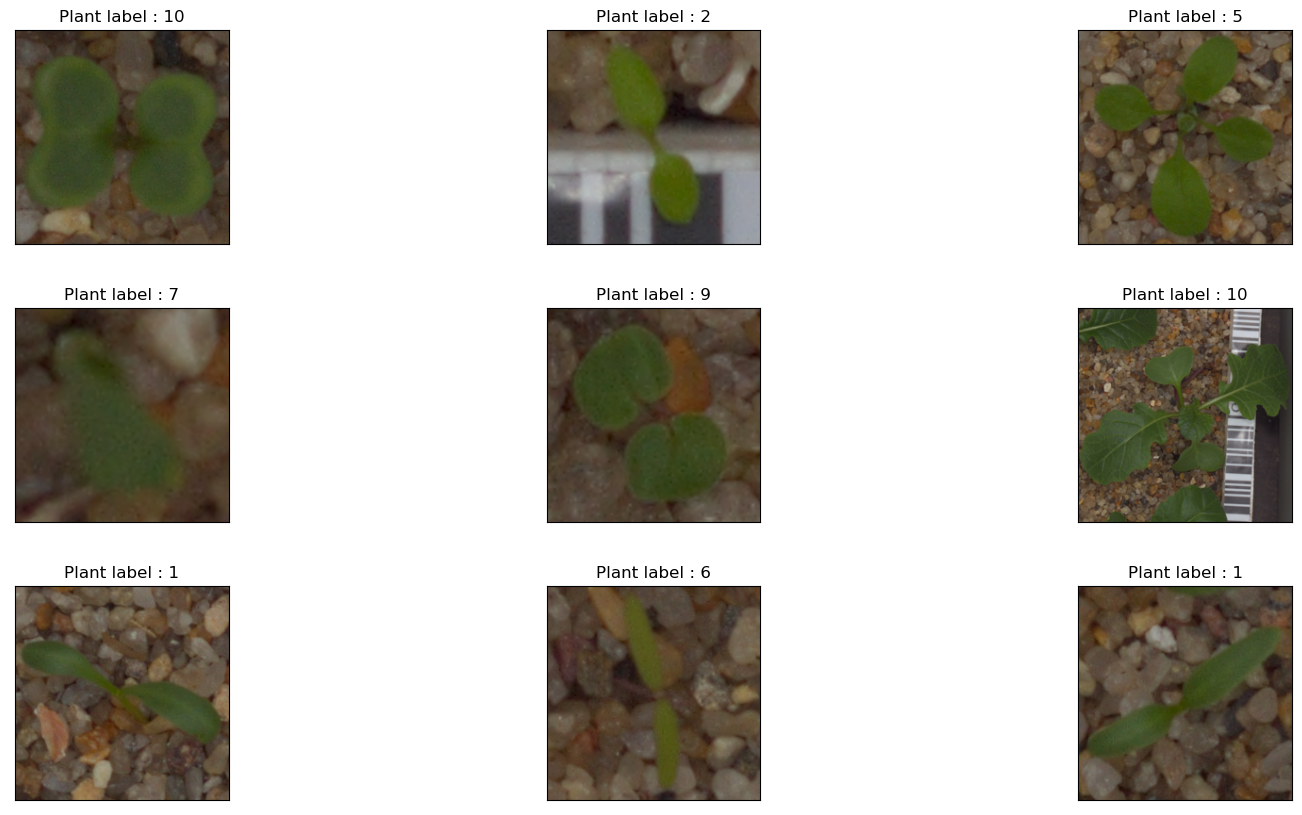

In [12]:
display_rand_images(x_train, y_train)

In [13]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

2022-12-03 13:42:19.930328: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-03 13:42:19.932517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                          

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
88/88 [==============================] - 17s 160ms/step - loss: 0.3544 - accuracy: 0.8640
Epoch 2/100
88/88 [==============================] - 14s 159ms/step - loss: 0.2524 - accuracy: 0.9035
Epoch 3/100
88/88 [==============================] - 14s 161ms/step - loss: 0.2502 - accuracy: 0.9006
Epoch 4/100
88/88 [==============================] - 14s 154ms/step - loss: 0.2244 - accuracy: 0.9081
Epoch 5/100
88/88 [==============================] - 15s 175ms/step - loss: 0.2167 - accuracy: 0.9128
Epoch 6/100
88/88 [==============================] - 15s 171ms/step - loss: 0.2158 - accuracy: 0.9107
Epoch 7/100
88/88 [==============================] - 15s 171ms/step - loss: 0.2024 - accuracy: 0.9139
Epoch 8/100
88/88 [==============================] - 15s 168ms/step - loss: 0.1827 - accuracy: 0.9275
Epoch 9/100
88/88 [==============================] - 15s 169ms/step - loss: 0.1637 - accuracy: 0.9351
Epoch 10/100
88/88 [==============================] - 14s 164ms/step - loss: 0.159

In [21]:
pred = model.predict(x_test).round()

pred.shape

22/22 [==============================] - 2s 68ms/step


(697, 20)

Plant label : 0
Plant label : 5
Plant label : 2
Plant label : 2
Plant label : 8
Plant label : 8
Plant label : 6
Plant label : 0
Plant label : 6


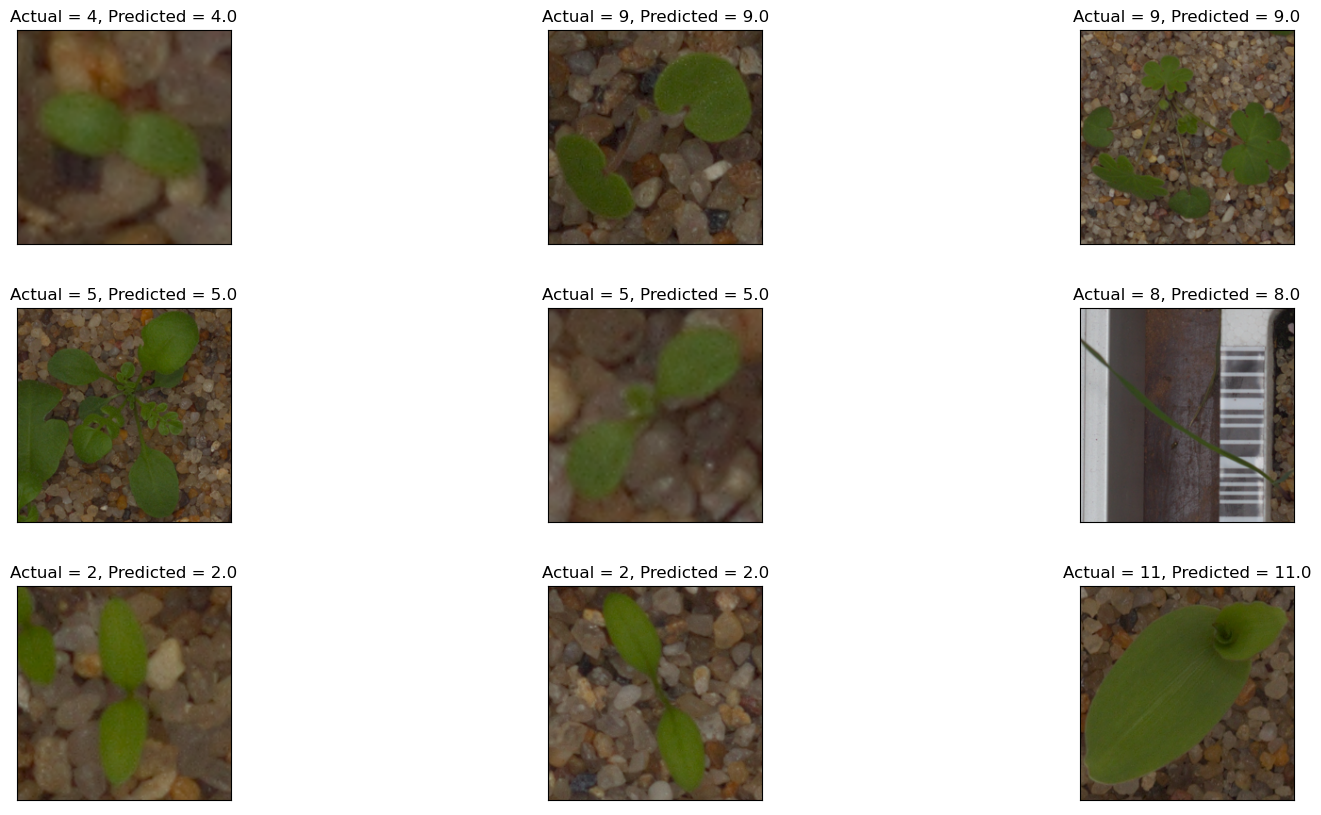

In [25]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])
    print('Plant label : {}'.format(labels[r[0]]))
    

plt.show()

In [26]:
print("Saving the model......")
# save model in JSON format
model_json = model.to_json()
json_file = open("/Users/chidex/model1.json", "w")
json_file.write(model_json)
print("Model saved in JSON format!")
    
# save training weights in h5 file
model.save_weights("/Users/chidex/model1.h5")
print("\nModel weights saved!")

Saving the model......
Model saved in JSON format!

Model weights saved!
